In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("/gdrive/My Drive/ML:March2020/Assignments/data/titanic_train.csv")  

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()
#Columns Age, Cabin & Embarked have missing values. Age & Embarked have few missing values. So any of the corrective method can be used. 
#Cabin has too many missing values. So its better to drop the column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
mean=data['Age'].mean()
data['Age']=data['Age'].fillna(mean)

In [ ]:
data['Embarked']=data['Embarked'].fillna((data['Embarked'].mode()[0]))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Removing Cabin & Name column
cols=[0,3,8,10]
data=data.drop(data.columns[cols], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.shape

(891, 8)

In [ ]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
data.Pclass.unique()

array([3, 1, 2])

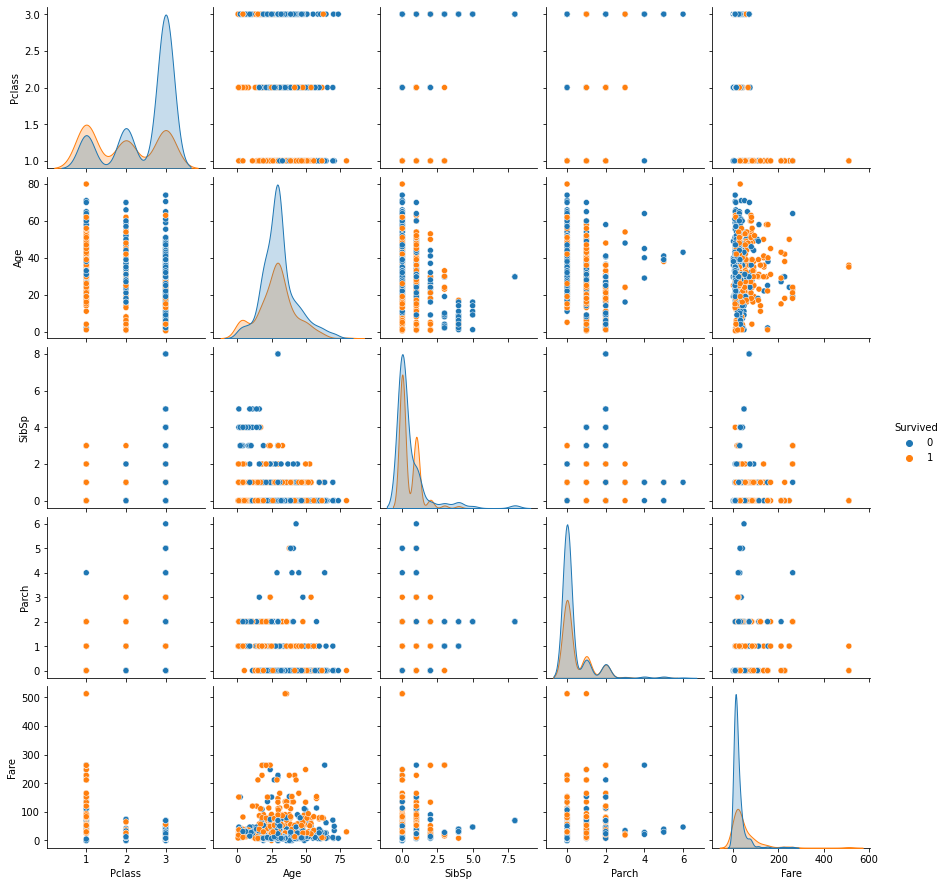

In [ ]:
sns.pairplot(data, hue="Survived")

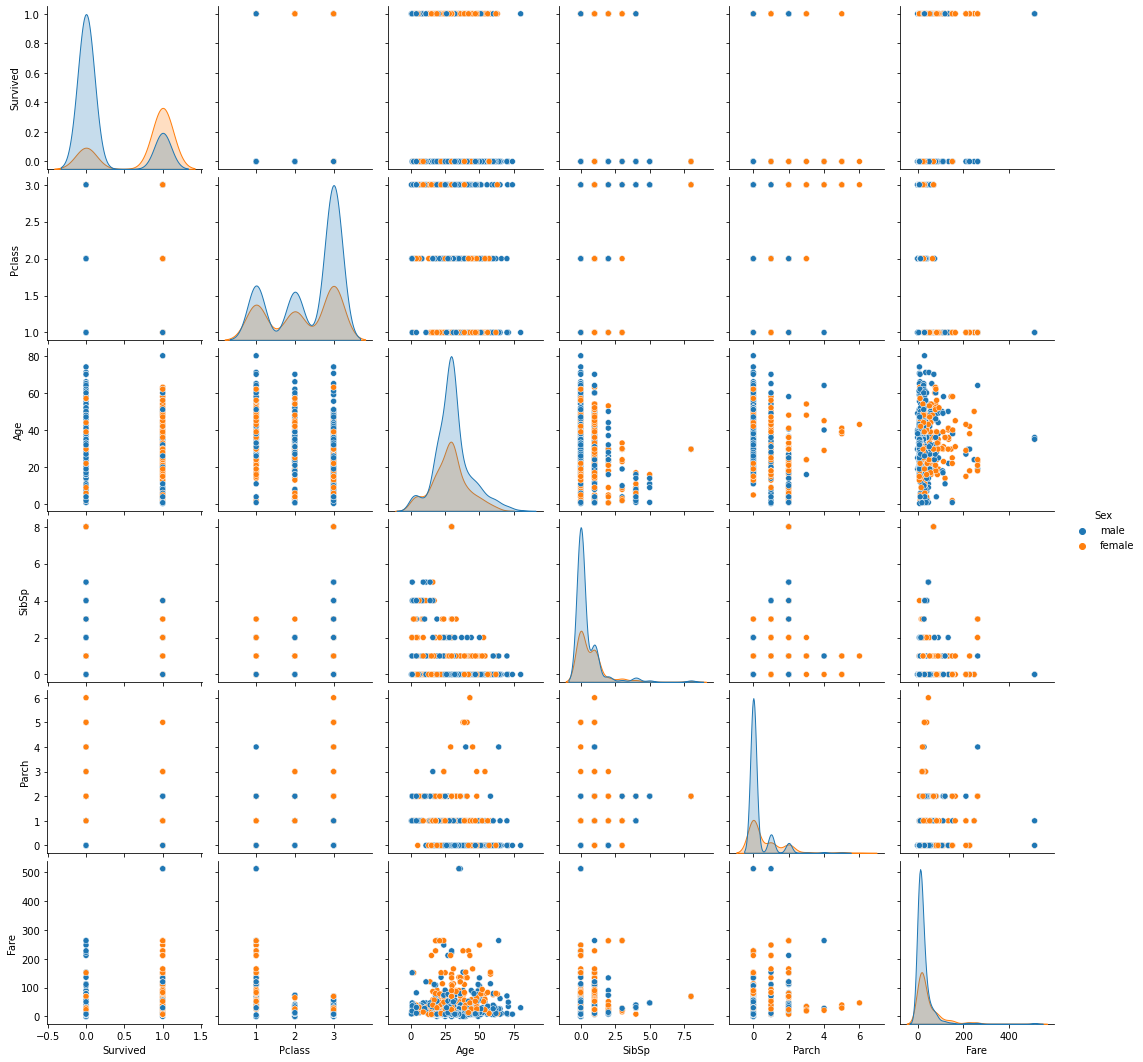

In [ ]:
sns.pairplot(data, hue="Sex")

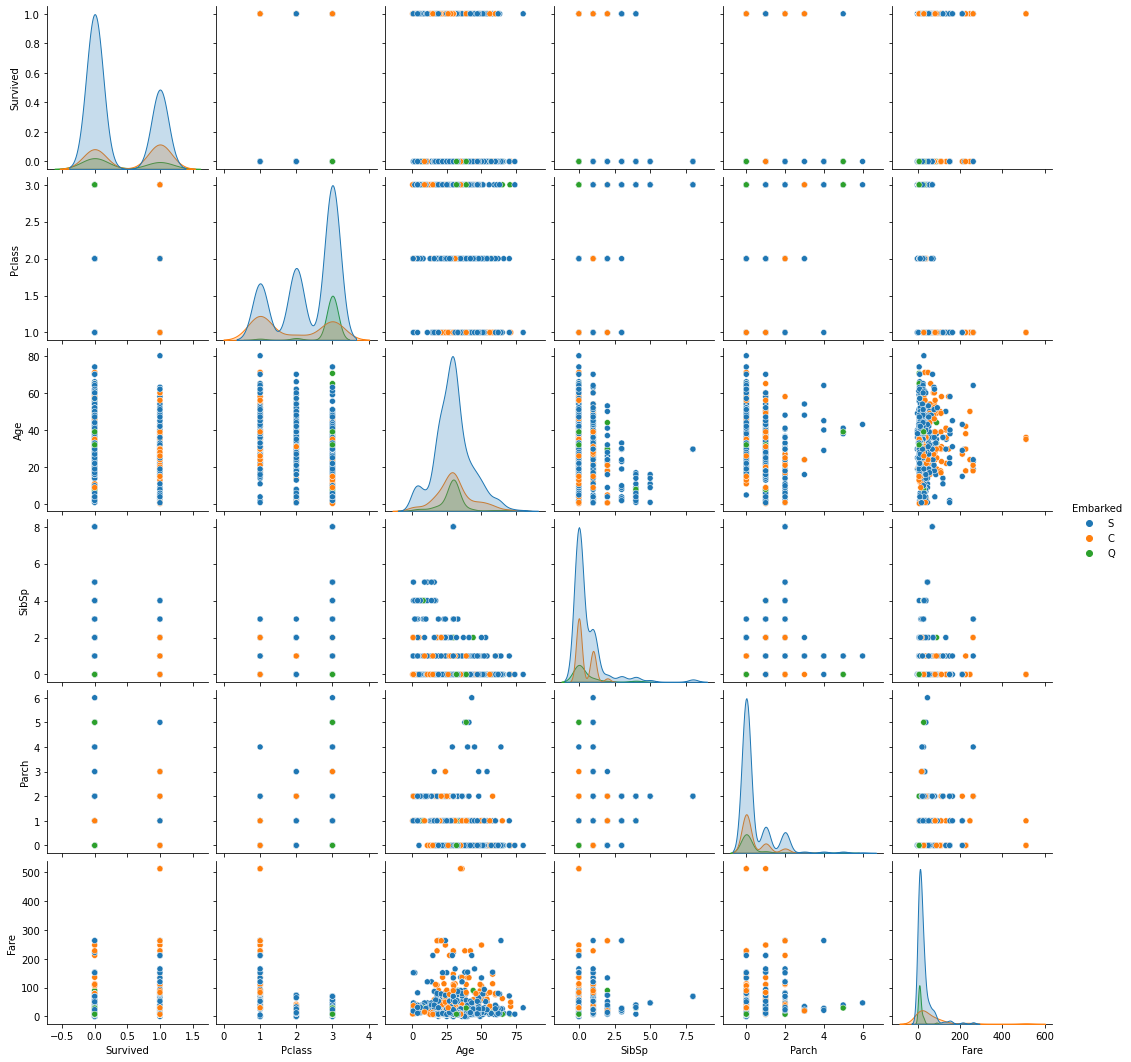

In [ ]:
sns.pairplot(data, hue="Embarked")

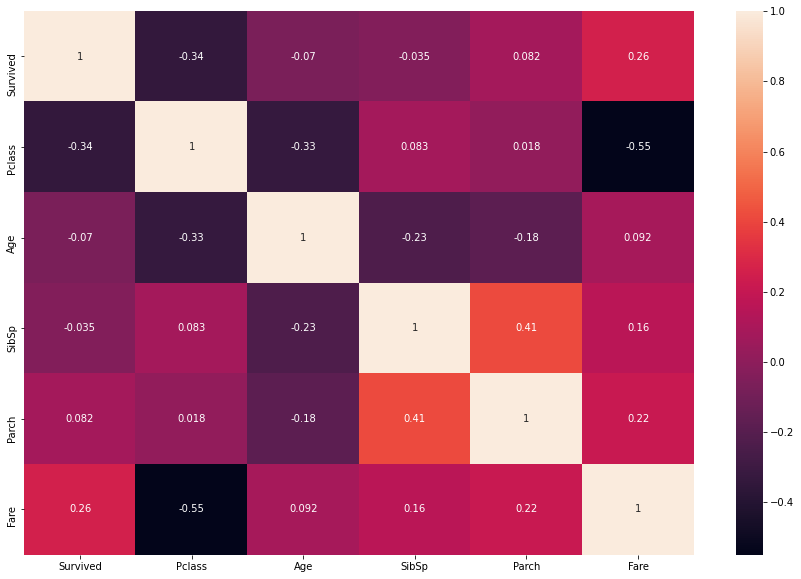

In [ ]:
plt.figure(figsize=(15,10))
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True);

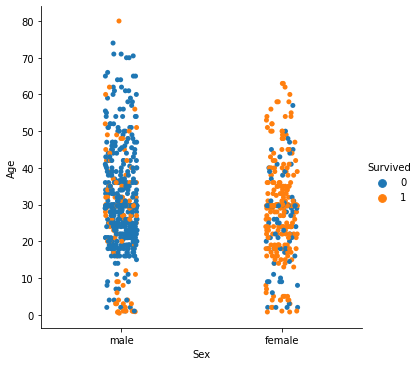

In [ ]:
sns.catplot(x='Sex',y='Age',hue='Survived',data=data)

In [ ]:
pd.crosstab(data['Survived'], data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


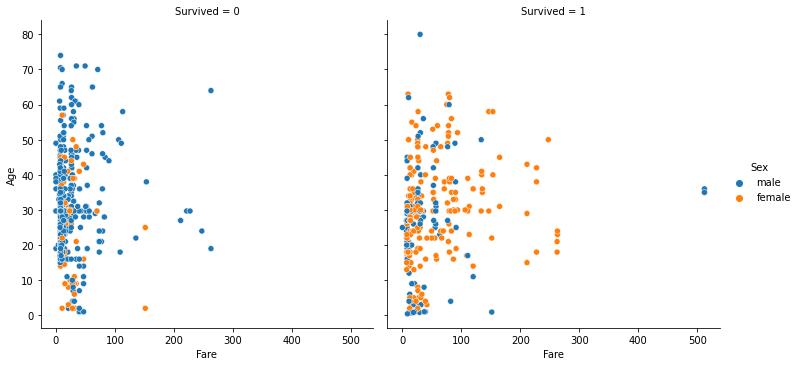

In [ ]:
sns.relplot(x="Fare", y="Age", hue="Sex",
            col="Survived", data=data,);

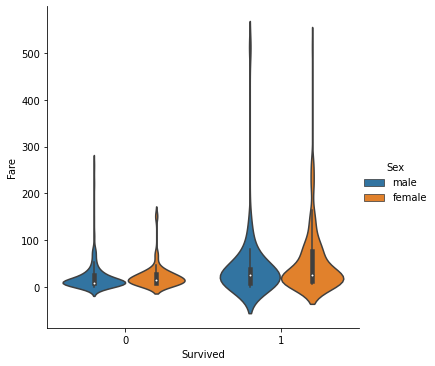

In [ ]:
sns.catplot(x="Survived", y="Fare", hue="Sex",
            kind="violin", data=data)

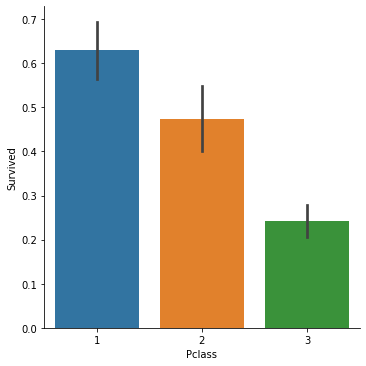

In [ ]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=data)

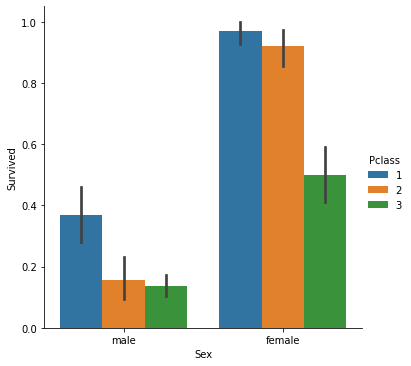

In [ ]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data)

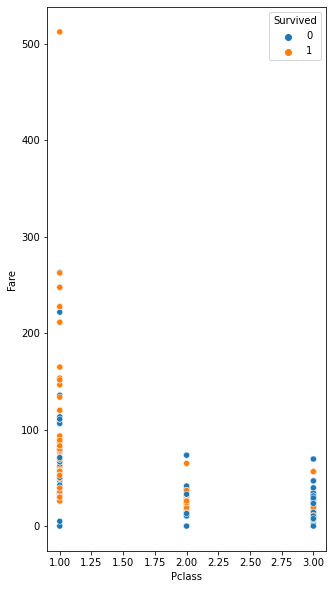

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,10
sns.scatterplot(x='Pclass',y='Fare',data=data,hue='Survived')

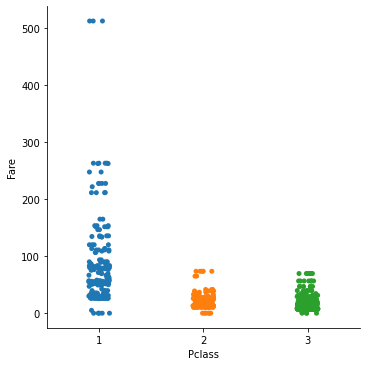

In [ ]:
sns.catplot(x="Pclass", y="Fare", data=data)

In [ ]:
pd.crosstab(data['Pclass'], data['Fare'])

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,6.9750,7.0458,7.0500,7.0542,7.1250,7.1417,7.2250,7.2292,7.2500,7.3125,7.4958,7.5208,7.5500,7.6292,7.6500,7.7250,7.7292,7.7333,7.7375,7.7417,7.7500,7.7750,7.7875,7.7958,7.8000,7.8292,7.8542,7.8750,7.8792,7.8875,...,73.5000,75.2500,76.2917,76.7292,77.2875,77.9583,78.2667,78.8500,79.2000,79.6500,80.0000,81.8583,82.1708,83.1583,83.4750,86.5000,89.1042,90.0000,91.0792,93.5000,106.4250,108.9000,110.8833,113.2750,120.0000,133.6500,134.5000,135.6333,146.5208,151.5500,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Pclass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,2,3,2,2,4,3,2,1,2,3,2,3,2,4,2,2,2,2,4,3,4,2,2,3,2,4,3,2,3,1,1,4,2,2,4,3
2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,1,1,2,2,1,1,2,1,7,2,4,1,12,15,13,1,3,1,4,1,4,1,1,4,2,1,34,16,1,6,1,2,13,1,4,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

Sex_labelencoder = LabelEncoder()
data["Sex"] = Sex_labelencoder.fit_transform(data["Sex"])

Embarked_labelencoder = LabelEncoder()
data["Embarked"] = Embarked_labelencoder.fit_transform(data["Embarked"])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
x=data.drop(columns=["Survived"])
y=data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=2)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) *100
print(acc)

77.09497206703911


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) *100
print(acc)

77.09497206703911


In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) *100
print(acc)

76.53631284916202


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm = 'brute',n_neighbors=4)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) *100
print(acc)

68.71508379888269


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=10000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf= rf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.81      0.75      0.78        79

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
from sklearn.metrics import roc_auc_score 

rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)

print('Random Forest: ROC AUC= {} %'.format(round(rf_auc, 3)*100))

Random Forest: ROC AUC= 85.3 %


In [ ]:
from sklearn.preprocessing import OneHotEncoder

x_train, X_train_lr, ytrain, y_train_lr = train_test_split(x_train, y_train, test_size=0.60, shuffle = True)

rf = RandomForestClassifier(n_estimators=10000)
rf.fit(x_train, ytrain)

rf_enc = OneHotEncoder()

rf_enc.fit(rf.apply(x_train))
rf_enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
f = rf_enc.transform(rf.apply(X_train_lr))
f.shape

(428, 709267)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_train_lr, y_train_lr)

parameters = {'solver':('liblinear', 'sag'), 'C':[0.001, 1]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
rf_lr = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)


rf_lr.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

print(rf_lr.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 0.001, 'solver': 'liblinear'}


In [ ]:
yprobs_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(x_test)))
yprobs_rf_lr= yprobs_rf_lr[:, 1]

In [ ]:
rf_lr_auc = roc_auc_score(y_test, yprobs_rf_lr)
print('Logistic and Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))

Logistic and Random Forest: ROC AUC= 85.39999999999999 %
